In [48]:
# control de velocidad motor DC
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# datos del motor
R = 2.27 #Ω
L = 0.0047 #H
B = 0.003026 #kg.m2/s
J = 0.00246 #kg. m2	
Kb = 0.25 #V/rad/s
Km = 0.25 #N.m/A

# función a integrar
def f(t,x):
    i = x[0]
    w = x[1]
    # vin
    if t < 0.1:
        vin = 0
    else:
        vin = 12
    # Tl
    if t < 0.5:
        Tl = 0
    else:
        Tl = 0.5
    f1 = -R/L * i - Kb/L * w + 1/L * vin
    f2 = Km/J *i - B/J * w - 1/J * Tl
    return [f1,f2]

resultado = solve_ivp(f,[0,1],[0,0])

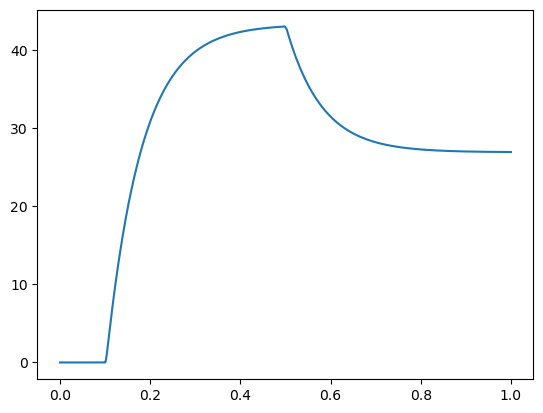

In [49]:
plt.plot(resultado.t,resultado.y[1])

In [50]:
# control de velocidad motor DC
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# datos del motor
R = 2.27 #Ω
L = 0.0047 #H
B = 0.003026 #kg.m2/s
J = 0.00246 #kg. m2	
Kb = 0.25 #V/rad/s
Km = 0.25 #N.m/A
kp = 10
VIN = [] # lista de datos de voltaje
TT = [] # lista de tiempos
# función a integrar
def f(t,x):
    i = x[0]
    w = x[1]
    # wr
    if t < 0.1:
        wr = 0
    else:
        wr = 43
    
    # Tl
    if t < 0.5:
        Tl = 0
    else:
        Tl = 0.5
    error = wr - w
    vin = kp*error
    TT.append(t)
    VIN.append(vin)
    f1 = -R/L * i - Kb/L * w + 1/L * vin
    f2 = Km/J *i - B/J * w - 1/J * Tl
    return [f1,f2]

resultado = solve_ivp(f,[0,1],[0,0])

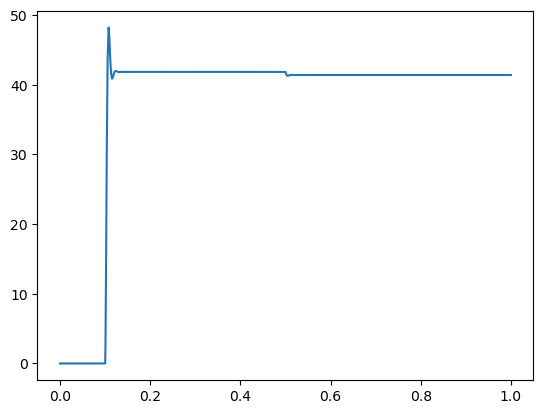

In [51]:
plt.plot(resultado.t,resultado.y[1])

In [52]:
Vin = []
for k in resultado.t:
    for j in range(len(TT)):
        if k == TT[j]:
            vtemp = VIN[j]
    Vin.append(vtemp)

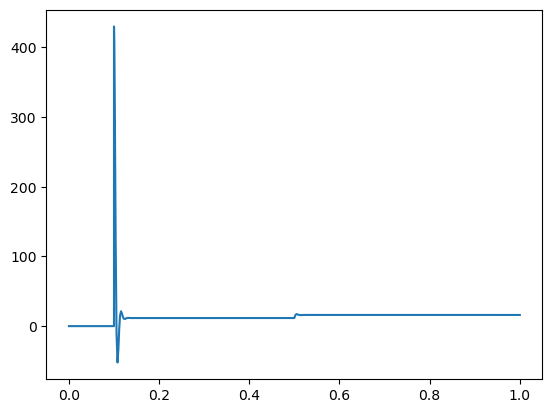

In [53]:
plt.plot(resultado.t,Vin)

In [54]:
import control as ct
G = ct.tf([Km/J/L],[1,R/L,Kb*Km/J/L,0])
G.poles()

array([-471.5143009 +0.j,  -11.46442251+0.j,    0.        +0.j])

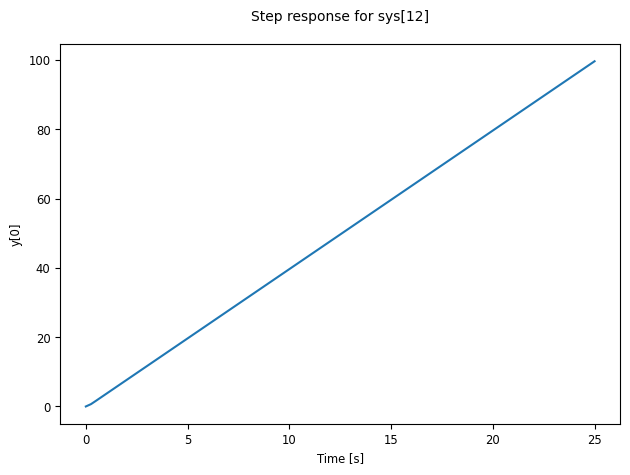

In [55]:
st = ct.step_response(G)
st.plot()

/opt/anaconda3/lib/python3.12/site-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


TypeError: 'tuple' object is not callable

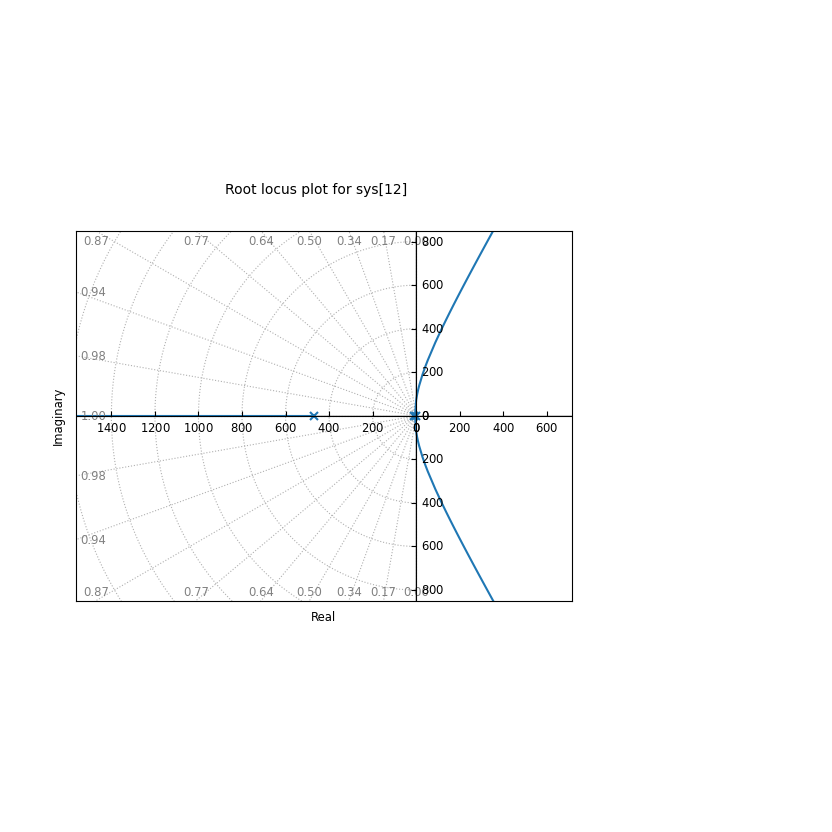

In [59]:
k = np.arange(0,25,0.01)
ax = ct.root_locus(G,plot = True)
plt.xlim([-30,0])
plt.ylim([-30,30])

